In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
Data = {'Country': ['USA','Canada','Germany','UK','France'],
        'GDP': [45000,42000,52000,49000,47000]}

df = pd.DataFrame(Data)
#df = pd.DataFrame(Data,columns=['Country','GDP_STATE'])

In [3]:
df.head()

,Country,GDP
0,USA,45000
1,Canada,42000
2,Germany,52000
3,UK,49000
4,France,47000


In [4]:
x = df['Country'].values
y = df['GDP'].values

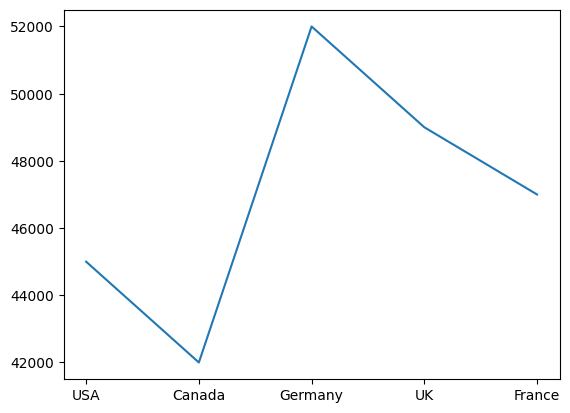

In [8]:
plt.plot(x,y)

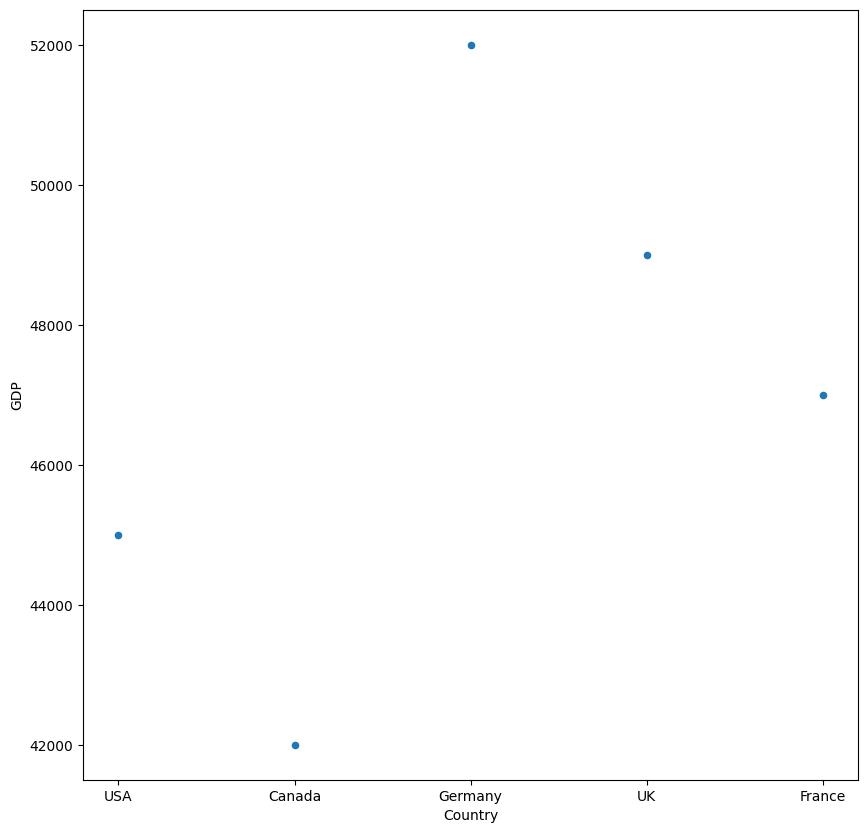

In [12]:
df.plot(x ='Country',y='GDP', figsize=(10, 10), kind = 'scatter');
#plt.show()

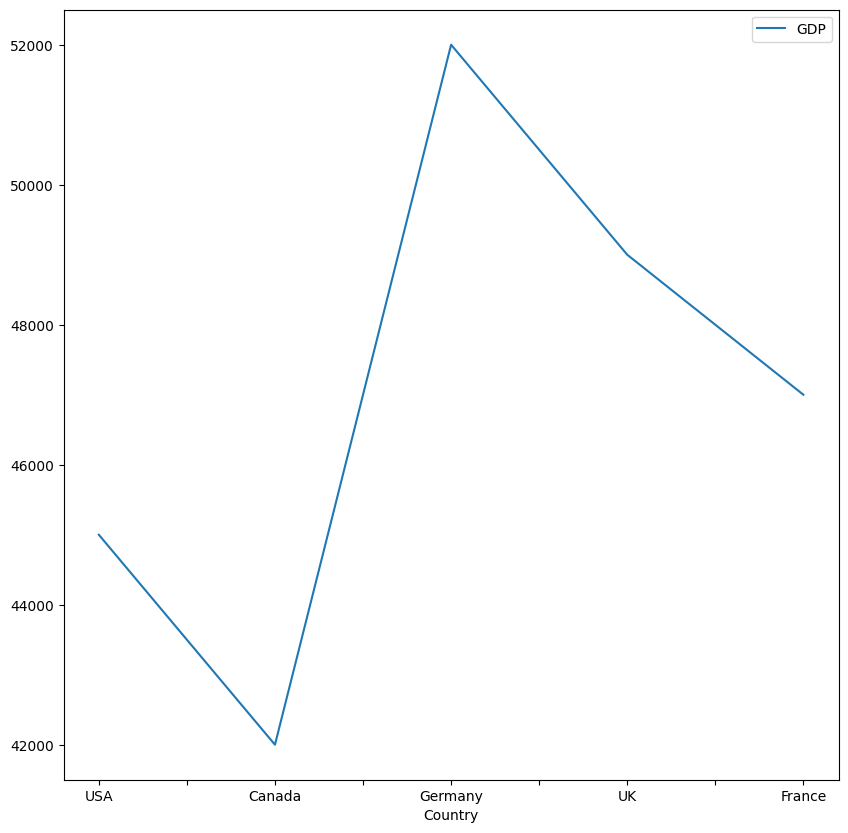

In [ ]:
df.plot(x ='Country',y='GDP', figsize=(10, 10),
        kind = 'line');
#plt.show()

In [13]:
Data = {'Tasks': [300,500,700]}
df = pd.DataFrame(Data,columns=['Tasks'])

In [14]:
df.head()

,Tasks
0,300
1,500
2,700


In [15]:
df = pd.DataFrame(Data,columns=['Tasks'],
                  index = ['Tasks Pending','Tasks Ongoing','Tasks Completed'])
df.head()

,Tasks
Tasks Pending,300
Tasks Ongoing,500
Tasks Completed,700


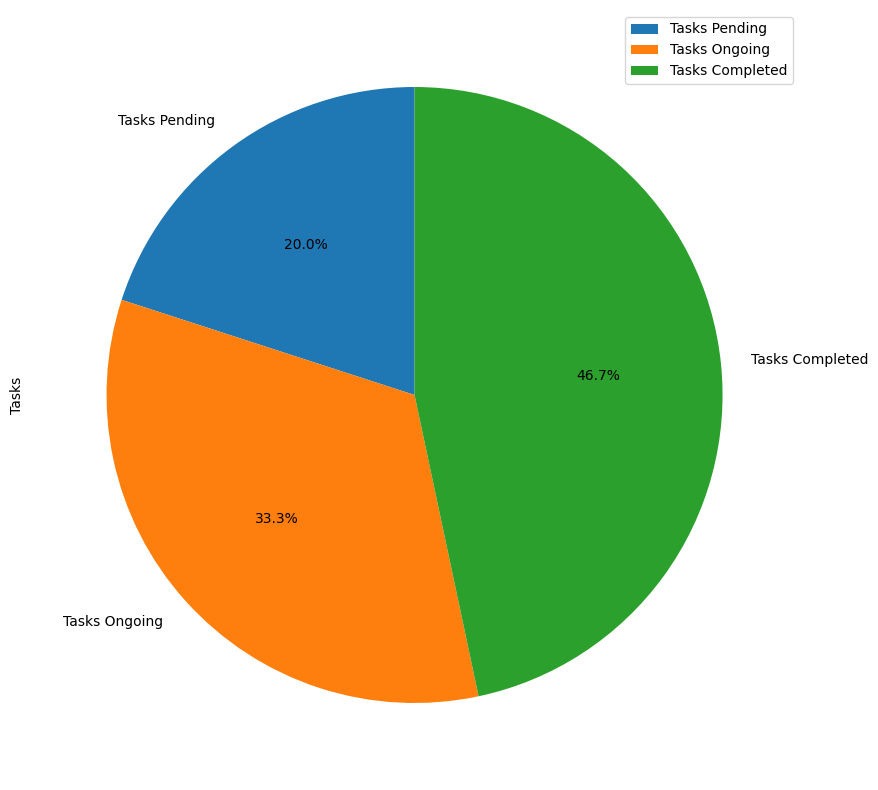

In [16]:
df.plot(y='Tasks',figsize=(10, 10),autopct='%1.1f%%',
            startangle=90,kind='pie');

In [ ]:
### Groupby

In [ ]:
url_superficie = "https://it.wikipedia.org/wiki/Primi_100_comuni_italiani_per_superficie"

In [ ]:
comuni_superficie = pd.read_html(url_superficie,
                                 attrs={"class":"wikitable"},
                                 header=0)

comuni_superficie = comuni_superficie[0]

In [ ]:
comuni_superficie = comuni_superficie.rename(columns={'Superficie (km²)': 'Superficie'})

In [ ]:
comuni_superficie.head()

,Pos.,Comune,Regione,Provincia,Superficie
0,1,Roma,Lazio,Roma,"1 287,24"
1,2,Ravenna,Emilia-Romagna,Ravenna,65381
2,3,Cerignola,Puglia,Foggia,59392
3,4,Noto,Sicilia,Siracusa,55498
4,5,Sassari,Sardegna,Sassari,54703


In [ ]:
comuni_superficie.groupby('Regione').mean()

<ipython-input-17-d634987a7d98>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  comuni_superficie.groupby('Regione').mean()


,Pos.
Regione,
Abruzzo,9.000000
Basilicata,54.000000
Calabria,52.333333
Emilia-Romagna,55.600000
Lazio,29.250000
Liguria,79.000000
Lombardia,93.500000
Marche,83.333333
Puglia,45.736842


In [ ]:
reg = comuni_superficie.groupby('Regione')
reg.aggregate([np.mean, np.std, pd.Series.count])

<ipython-input-18-2e344618b948>:2: FutureWarning: ['Comune', 'Provincia', 'Superficie'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  reg.aggregate([np.mean, np.std, pd.Series.count])


Pos.                 
                          mean        std count
Regione                                        
Abruzzo               9.000000        NaN     1
Basilicata           54.000000  32.787193     3
Calabria             52.333333  26.407070     3
Emilia-Romagna       55.600000  30.376160    10
Lazio                29.250000  24.743686     4
Liguria              79.000000        NaN     1
Lombardia            93.500000   2.121320     2
Marche               83.333333  24.542480     3
Puglia               45.736842  28.993950    19
Sardegna             66.000000  32.783380     9
Sicilia              45.631579  27.761305    19
Toscana              51.714286  26.286670    14
Trentino-Alto Adige  55.500000  23.334524     2
Umbria               32.000000  20.647841     7
Veneto               48.000000  28.583212     3

In [ ]:
comuni_superficie.groupby('Regione')['Superficie'].count()

Regione
Abruzzo                 1
Basilicata              3
Calabria                3
Emilia-Romagna         10
Lazio                   4
Liguria                 1
Lombardia               2
Marche                  3
Puglia                 19
Sardegna                9
Sicilia                19
Toscana                14
Trentino-Alto Adige     2
Umbria                  7
Veneto                  3
Name: Superficie, dtype: int64

In [ ]:
comuni_superficie.groupby('Regione')['Superficie'].count().sort_values(ascending=False)

Regione
Puglia                 19
Sicilia                19
Toscana                14
Emilia-Romagna         10
Sardegna                9
Umbria                  7
Lazio                   4
Basilicata              3
Calabria                3
Marche                  3
Veneto                  3
Lombardia               2
Trentino-Alto Adige     2
Abruzzo                 1
Liguria                 1
Name: Superficie, dtype: int64

In [ ]:
## PETS

In [17]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


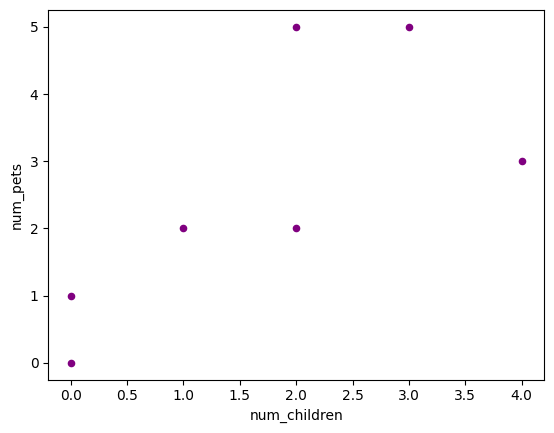

In [18]:
df.plot(kind='scatter',x='num_children',y='num_pets',color='purple');

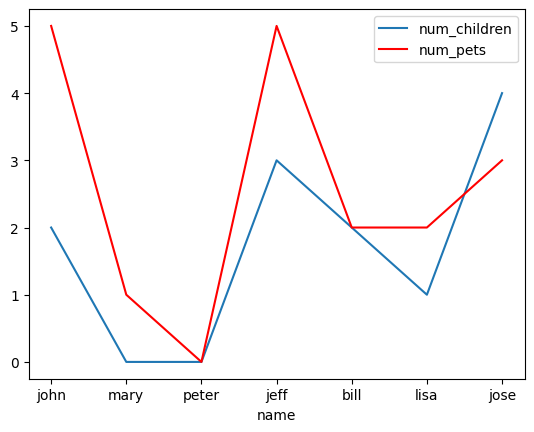

In [19]:
# gca stands for 'get current axis'
ax = plt.gca()
df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax);

#plt.show()

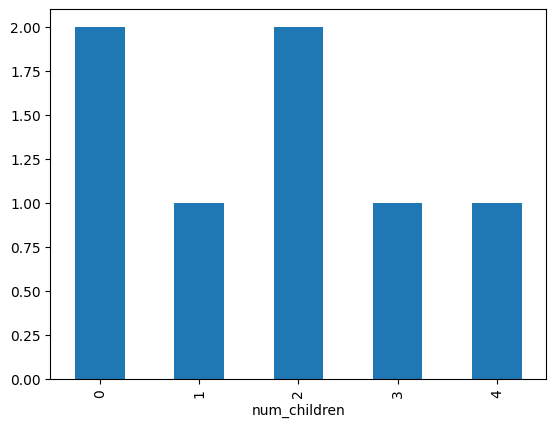

In [ ]:
df.groupby('num_children').size().plot(kind='bar');

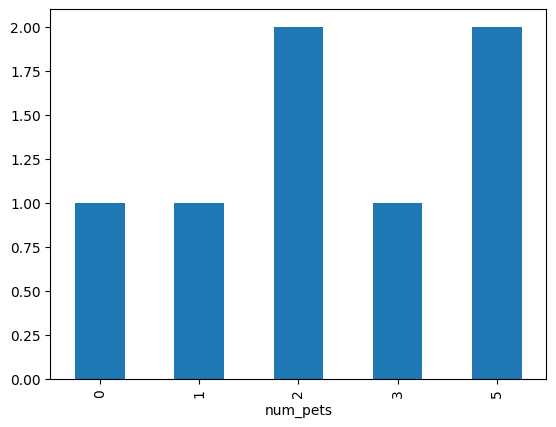

In [ ]:
df.groupby('num_pets').size().plot(kind='bar');

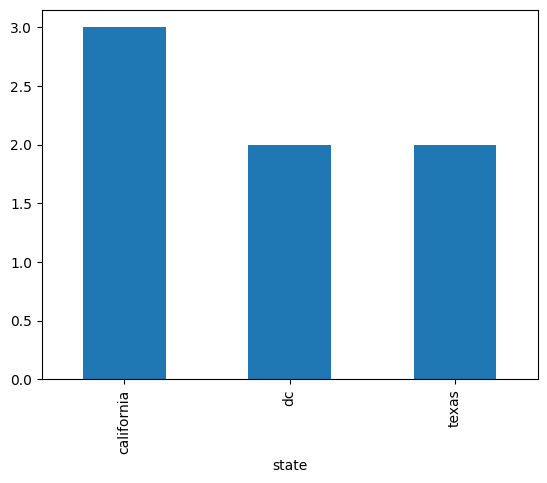

In [ ]:
df.groupby('state').size().plot(kind='bar');

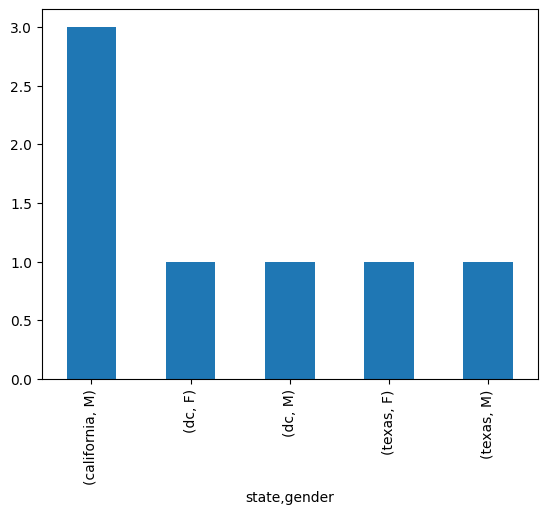

In [ ]:
df.groupby(['state','gender']).size().plot(kind='bar');

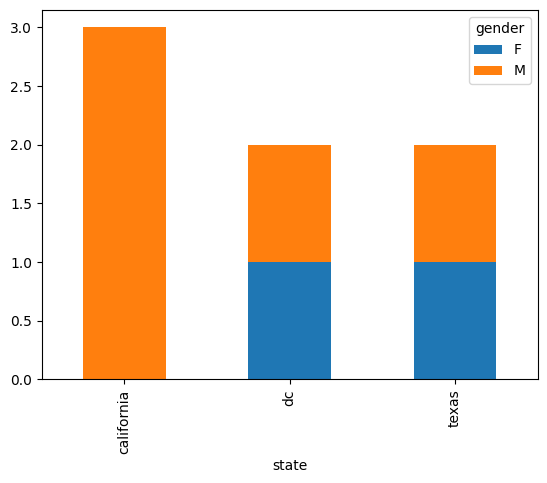

In [ ]:
df.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True);

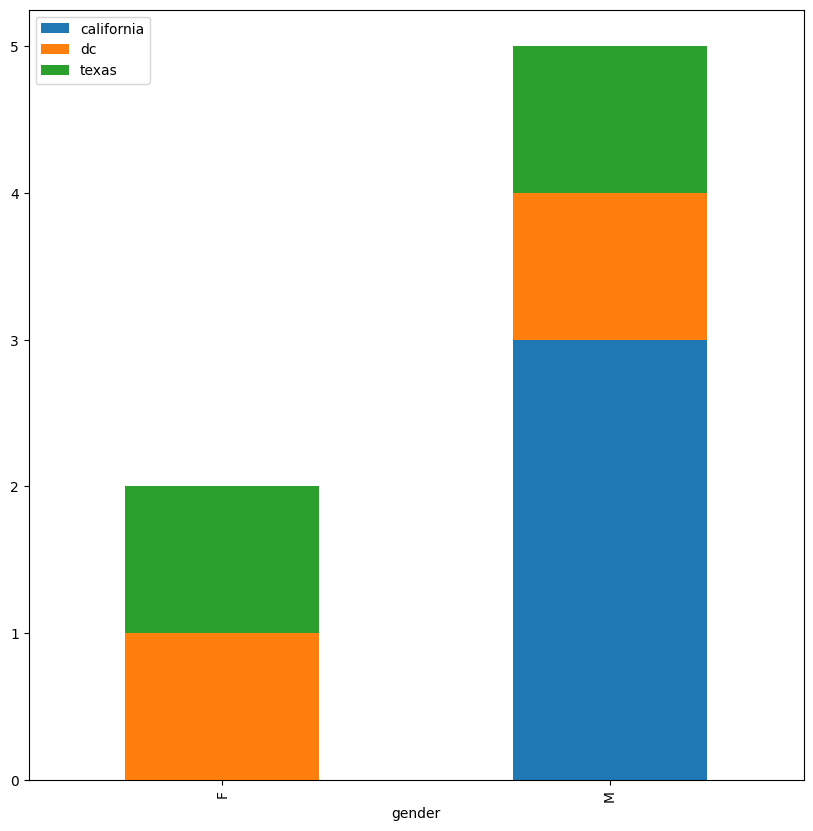

In [ ]:
df.groupby(['gender','state']).size().unstack().plot(kind='bar',
                                                     stacked=True,
                                                     figsize=(10, 10))
plt.legend(loc='upper left');